In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
bikes = pd.read_csv('../../Dados/capital_share_bike.csv')
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
bikes.datetime = pd.to_datetime(bikes.datetime)
bikes = bikes.set_index('datetime')
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


**Verificando valores**

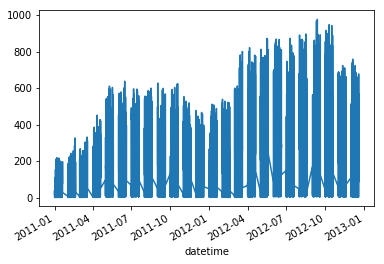

In [4]:
bikes['count'].plot()

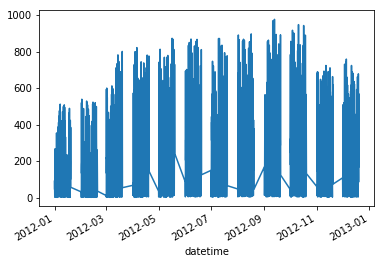

In [5]:
bikes['2012']['count'].plot()

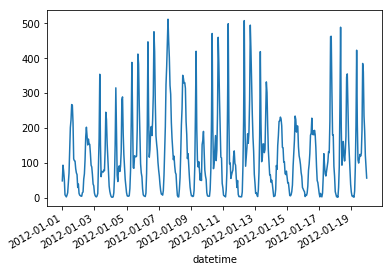

In [6]:
bikes['2012-01']['count'].plot()

**Pegando dados novos**

In [7]:
bikes['day'] = bikes.index.day
bikes['month'] = bikes.index.month
bikes['year'] = bikes.index.year
bikes['dayofweek'] = bikes.index.dayofweek

**Agrupando por mes**

In [8]:
grupoBike = bikes.groupby(pd.Grouper(freq='M'))
mediaMensal = grupoBike.mean()

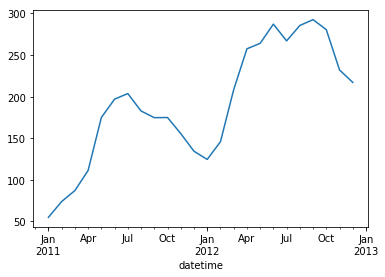

In [9]:
mediaMensal['count'].plot()

**Tratando dados**

In [10]:
y = mediaMensal['count']
x = mediaMensal.drop(['count','casual','registered'],axis=1)

In [11]:
from sklearn.model_selection import cross_val_score

**Fazendo Regressões**

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

C:\Users\vinic\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [13]:
tree = DecisionTreeRegressor()
knn = KNeighborsRegressor(weights='distance')
rf = RandomForestRegressor()
lm = LinearRegression()

In [14]:
crossT = cross_val_score(tree,X=x,y=y,cv=5,scoring='neg_mean_absolute_error')
crossK = cross_val_score(knn,X=x,y=y,cv=5,scoring='neg_mean_absolute_error')
crossR = cross_val_score(rf,X=x,y=y,cv=5,scoring='neg_mean_absolute_error')
croosL = cross_val_score(lm,X=x,y=y,cv=5,scoring='neg_mean_absolute_error')

In [15]:
df = pd.DataFrame([crossT,crossK,crossR,croosL],index=['tree','knn','rf','lm'])
df.transpose().describe()

,tree,knn,rf,lm
count,5.000000,5.000000,5.000000,5.000000
mean,-39.638712,-73.237730,-45.581253,-29.276370
std,25.866387,12.667782,19.538826,10.719814
min,-69.637280,-86.248740,-73.819993,-43.295819
25%,-62.114034,-81.582919,-50.850639,-32.822531
50%,-37.136350,-76.728371,-48.966138,-32.337745
75%,-17.515390,-67.221142,-29.355715,-22.733109
max,-11.790508,-54.407479,-24.913780,-15.192648


**Train Teste**

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
xTreino,xTeste,yTreino,yTeste = train_test_split(x,y)

In [18]:
knn.fit(xTreino,yTreino)
tree.fit(xTreino,yTreino)
rf.fit(xTreino,yTreino)
lm.fit(xTreino,yTreino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
preditosKnn = knn.predict(xTeste)
preditosTree = tree.predict(xTeste)
preditosRf = rf.predict(xTeste)
preditosLm = lm.predict(xTeste)

In [20]:
from sklearn.metrics import mean_absolute_error

In [21]:
print('knn:',mean_absolute_error(preditosKnn,yTeste)/y.mean())
print('tree:',mean_absolute_error(preditosTree,yTeste)/y.mean())
print('RF:',mean_absolute_error(preditosRf,yTeste)/y.mean())
print('LM:',mean_absolute_error(preditosLm,yTeste)/y.mean())

knn: 0.2708783208818994
tree: 0.14830175430716222
RF: 0.16419028472695016
LM: 0.17012774082792229


**Utilizando get_dummies**

In [22]:
from sklearn.preprocessing import OneHotEncoder

In [23]:
bikes['season'] = bikes['season'].astype(str)
bikes['dayofweek'] = bikes['season'].astype(str)
bikes['weather'] = bikes['season'].astype(str)

In [24]:
bikesDummies = pd.get_dummies(bikes)
bikesDummies.head(3)

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,day,...,season_3,season_4,weather_1,weather_2,weather_3,weather_4,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0,3,13,16,1,...,0,0,1,0,0,0,1,0,0,0
2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0,8,32,40,1,...,0,0,1,0,0,0,1,0,0,0
2011-01-01 02:00:00,0,0,9.02,13.635,80,0.0,5,27,32,1,...,0,0,1,0,0,0,1,0,0,0


In [25]:
grupoDummies = bikes.groupby(pd.Grouper(freq='d'))
mediaMensal = grupoDummies.mean().dropna()

In [26]:
y = mediaMensal['count']
x = mediaMensal.drop(['count','casual','registered'],axis=1)

In [27]:
tree = DecisionTreeRegressor()
knn = KNeighborsRegressor(weights='distance')
rf = RandomForestRegressor()
lm = LinearRegression()

In [28]:
crossT = cross_val_score(tree,X=x,y=y,cv=5,scoring='neg_mean_absolute_error')
crossK = cross_val_score(knn,X=x,y=y,cv=5,scoring='neg_mean_absolute_error')
crossR = cross_val_score(rf,X=x,y=y,cv=5,scoring='neg_mean_absolute_error')
croosL = cross_val_score(lm,X=x,y=y,cv=5,scoring='neg_mean_absolute_error')

In [29]:
df = pd.DataFrame([crossT,crossK,crossR,croosL],index=['tree','knn','rf','lm'])
df.transpose().describe()

,tree,knn,rf,lm
count,5.000000,5.000000,5.000000,5.000000
mean,-43.288640,-70.666623,-39.668266,-30.009281
std,12.348033,10.412529,14.354542,6.385316
min,-58.289314,-80.829665,-53.705733,-39.941303
25%,-48.058071,-77.572148,-52.961707,-30.775016
50%,-47.952381,-74.612791,-40.928719,-30.342492
75%,-35.647257,-64.972133,-29.851630,-25.699094
max,-26.496178,-55.346379,-20.893540,-23.288501


In [30]:
croosL.mean()/y.mean()

-0.15709812052843306

**Sem agrupamento**

In [31]:
y = bikes['count']
x = bikes.drop(['count','casual','registered'],axis=1)

In [32]:
tree = DecisionTreeRegressor()
knn = KNeighborsRegressor(weights='distance')
rf = RandomForestRegressor()
lm = LinearRegression()
lm = LinearRegression()

In [33]:
crossT = cross_val_score(tree,X=x,y=y,cv=5,scoring='neg_mean_absolute_error')
crossK = cross_val_score(knn,X=x,y=y,cv=5,scoring='neg_mean_absolute_error')
crossR = cross_val_score(rf,X=x,y=y,cv=5,scoring='neg_mean_absolute_error')
croosL = cross_val_score(lm,X=x,y=y,cv=5,scoring='neg_mean_absolute_error')

In [34]:
df = pd.DataFrame([crossT,crossK,crossR,croosL],index=['tree','knn','rf','lm'])
df.transpose().describe()

,tree,knn,rf,lm
count,5.000000,5.000000,5.000000,5.000000
mean,-157.012865,-135.404458,-130.463854,-117.968458
std,32.325326,27.225127,28.501681,34.489293
min,-195.188601,-160.809406,-158.440289,-155.997203
25%,-184.904762,-159.476398,-158.341371,-150.324594
50%,-153.036442,-142.674232,-132.200547,-113.749380
75%,-126.634742,-113.236726,-105.422801,-90.279203
max,-125.299778,-100.825528,-97.914261,-79.491908


**SemAgrupamento Train**

In [35]:
xTreino,xTeste,yTreino,yTeste = train_test_split(x,y)

In [36]:
knn.fit(xTreino,yTreino)
tree.fit(xTreino,yTreino)
rf.fit(xTreino,yTreino)
lm.fit(xTreino,yTreino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
preditosKnn = knn.predict(xTeste)
preditosTree = tree.predict(xTeste)
preditosRf = rf.predict(xTeste)
preditosLm = lm.predict(xTeste)

In [38]:
print('knn:',mean_absolute_error(preditosKnn,yTeste)/y.mean())
print('tree:',mean_absolute_error(preditosTree,yTeste)/y.mean())
print('RF:',mean_absolute_error(preditosRf,yTeste)/y.mean())
print('LM:',mean_absolute_error(preditosLm,yTeste)/y.mean())

knn: 0.5793029789730998
tree: 0.6336842388264103
RF: 0.5233261066795631
LM: 0.5976413802796544


## Graficos

**Grafico de error**

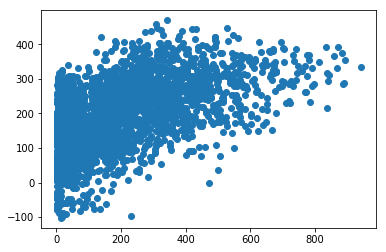

In [39]:
plt.scatter(x=yTeste,y=preditosLm)

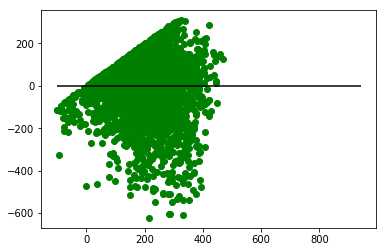

In [40]:
plt.scatter(x=preditosLm, y= (preditosLm - yTeste),c='green')
plt.hlines(y=0,xmin=preditosLm.min(),xmax=yTeste.max())

**Polinimial regression**

In [41]:
from sklearn.preprocessing import PolynomialFeatures

In [42]:
poly = PolynomialFeatures(degree=3)
poly.fit(x)
xTreino_poly = poly.transform(xTreino)
xTeste_poly = poly.fit_transform(xTeste)

In [43]:
lm.fit(xTreino_poly,yTreino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
preditosLm = lm.predict(xTeste_poly)
print('LM:',mean_absolute_error(preditosLm,yTeste)/y.mean())

LM: 0.5519564965399307


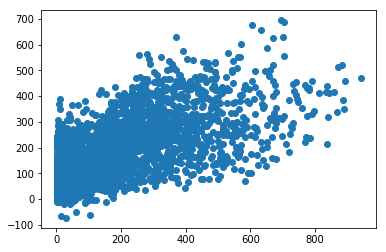

In [45]:
plt.scatter(x=yTeste,y=preditosLm)

**Utilizando o StatsModel**

In [46]:
xdummies = pd.get_dummies(x)

In [47]:
import statsmodels.api as sm
#X_inter = sm.add_constant(X) # adiciona uma coluna constante igual a 1 na matriz X,
# de modo que o termo constante da regressão é retornado.
modelo = sm.OLS(y,xdummies).fit()

In [48]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     429.7
Date:                Tue, 19 Feb 2019   Prob (F-statistic):               0.00
Time:                        18:25:13   Log-Likelihood:                -69933.
No. Observations:               10886   AIC:                         1.399e+05
Df Residuals:                   10873   BIC:                         1.400e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
holiday        -5.3344      8.944     -0.596      0.551     -22.866      12.197
workingday     -2.1359      3.177     -0.672      0.501      -8.364       4.092
temp            6.5865      1.167      5.643      0.000       4.298       8.874
atemp           3.3760      1.024      3.297      0.001       1.369       5.383
humidity       -2.6768      0.082    -32.689      0.000      -2.837      -2.516
windspeed       0.8129      0.191      4.260      0.000       0.439       1.187
day             0.2807      0.262      1.073      0.283      -0.232       0.793
month          10.1739      1.775      5.733      0.000       6.695      13.653
year           76.9517      2.886     26.666      0.000      71.295      82.608
season_1    -5.156e+04   1934.983    -26.648      0.000   -5.54e+04   -4.78e+04
season_2    -5.157e+04   1934.886    -26.653      0.000   -5.54e+04   -4.78e+04
season_3    -5.159e+04   1934.829    -26.664      0.000   -5.54e+04   -4.78e+04
season_4    -5.157e+04   1934.955    -26.652      0.000   -5.54e+04   -4.78e+04
weather_1   -5.156e+04   1934.983    -26.648      0.000   -5.54e+04   -4.78e+04
weather_2   -5.157e+04   1934.886    -26.653      0.000   -5.54e+04   -4.78e+04
weather_3   -5.159e+04   1934.829    -26.664      0.000   -5.54e+04   -4.78e+04
weather_4   -5.157e+04   1934.955    -26.652      0.000   -5.54e+04   -4.78e+04
dayofweek_1 -5.156e+04   1934.983    -26.648      0.000   -5.54e+04   -4.78e+04
dayofweek_2 -5.157e+04   1934.886    -26.653      0.000   -5.54e+04   -4.78e+04
dayofweek_3 -5.159e+04   1934.829    -26.664      0.000   -5.54e+04   -4.78e+04
dayofweek_4 -5.157e+04   1934.955    -26.652      0.000   -5.54e+04   -4.78e+04
==============================================================================
Omnibus:                     1647.814   Durbin-Watson:                   0.469
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2744.790
Skew:                           1.016   Prob(JB):                         0.00
Kurtosis:                       4.387   Cond. No.                     4.94e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.81e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Auto Regressão

In [49]:
bikes2 = bikes[['count']]
bikes2.columns=['count']
bikes2['Shift_1'] = bikes[['count']].shift(1)
bikes2['Shift_24'] = bikes[['count']].shift(24)
bikes2['Shift_168'] = bikes[['count']].shift(128)

C:\Users\vinic\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\vinic\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\vinic\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a co

In [50]:
bikes2.head()

,count,Shift_1,Shift_24,Shift_168
datetime,,,,
2011-01-01 00:00:00,16,NaN,NaN,NaN
2011-01-01 01:00:00,40,16.0,NaN,NaN
2011-01-01 02:00:00,32,40.0,NaN,NaN
2011-01-01 03:00:00,13,32.0,NaN,NaN
2011-01-01 04:00:00,1,13.0,NaN,NaN


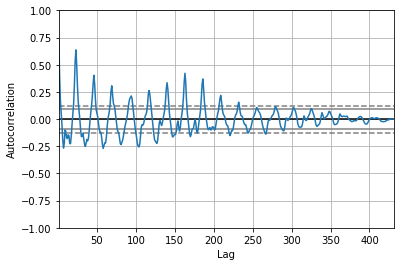

In [51]:
pd.plotting.autocorrelation_plot(bikes['2011-01']['count'])

**Diario**

In [52]:
bikesGroup = bikes.groupby(pd.Grouper(freq='d')).mean()

In [53]:
bikesGroup2 = bikesGroup[['count']]
bikesGroup2.columns=['count']
bikesGroup2['Shift_1'] = bikesGroup['count'].shift(1)
bikesGroup2['Shift_7'] = bikesGroup['count'].shift(7)
bikesGroup2['Shift_30'] = bikesGroup['count'].shift(30)
bikesGroup2['Shift_365'] = bikesGroup['count'].shift(300)

C:\Users\vinic\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\vinic\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\vinic\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a co

In [54]:
# pd.plotting.autocorrelation_plot(vendas['count'].dropna())

In [55]:
bikesGroup2.dropna().corr()

,count,Shift_1,Shift_7,Shift_30,Shift_365
count,1.000000,0.803296,0.752931,0.623249,0.463408
Shift_1,0.803296,1.000000,0.712880,0.663889,0.470196
Shift_7,0.752931,0.712880,1.000000,0.658950,0.492355
Shift_30,0.623249,0.663889,0.658950,1.000000,0.351849
Shift_365,0.463408,0.470196,0.492355,0.351849,1.000000


In [56]:
from statsmodels.graphics.tsaplots import plot_acf

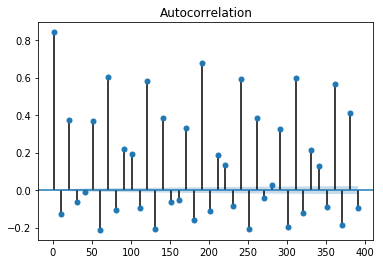

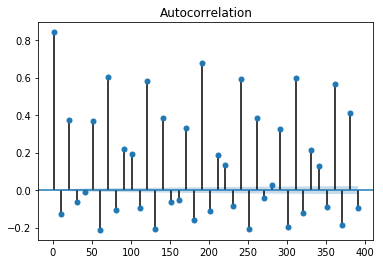

In [57]:
atraso = np.arange(1,400,10)
plot_acf(bikes['count'],lags=atraso,use_vlines=True,alpha=0.80)

## AutoRegressão

In [58]:
from statsmodels.tsa.ar_model import AR

In [59]:
vendas = pd.read_csv('salesFacts.csv',sep='\t')

In [60]:
vendas.head()

,ProductID,Date,Zip,Units,Revenue
0,88,15/02/2000 12:00:00 AM,95605,92,"$926,780.40"
1,2263,12/11/2008 12:00:00 AM,33178,44,"$177,380.28"
2,2262,12/11/2008 12:00:00 AM,33178,44,"$177,380.28"
3,764,27/07/2004 12:00:00 AM,27522,40,"$146,134.80"
4,763,27/07/2004 12:00:00 AM,27522,40,"$146,134.80"


In [61]:
vendas.index = pd.to_datetime(vendas['Date'],format='%d/%m/%Y %H:%M:%S %p')

In [62]:
def tratRev(valor):
    if type(valor) == str:
        valor = valor[1:].replace(',','')
        return float(valor)
vendas.Revenue = vendas.Revenue.apply(tratRev) 

In [63]:
vendas.ProductID.value_counts()[:5] 

604     14355
792     12961
791     12961
2332    12715
2045    12407
Name: ProductID, dtype: int64

In [64]:
principal = vendas[vendas['ProductID'] == 604]
dados = principal.groupby(pd.Grouper(freq='d')).mean()

In [65]:
Valores = dados['Revenue'].dropna().values

In [66]:
Val_treino = Valores[:int(len(Valores)*0.33)]
len(Val_treino)

1119

In [67]:
Val_teste = Valores[int(len(Valores)*0.33):]

In [68]:
modelo = AR(Val_treino)
modelo_fit = modelo.fit()

In [69]:
previsao = modelo_fit.predict(start=len(Val_treino),end=len(Val_treino)+len(Val_teste)-1)
previsao

array([6056.87136356, 6056.4149889 , 6597.63852497, ..., 5901.01148254,
       5901.01148254, 5901.01148254])

In [70]:
mean_absolute_error(previsao,Val_teste)/Valores.mean()

0.06997299211946142

In [81]:
!pip install pyramid

In [82]:

stepwise_model = auto_arima(data, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

ModuleNotFoundError: No module named 'pyramid.arima'

In [ ]:
stepwise_model.fit(t)

In [74]:
from statsmodels.tsa.arima_model import ARIMA

In [79]:


modelo = ARIMA(Val_treino,order=(5,1,0))
modelo_fit = modelo.fit()

C:\Users\vinic\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\vinic\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\vinic\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future th

In [80]:
previsao = modelo_fit.predict(start=len(Val_treino),end=len(Val_treino)+len(Val_teste)-1)
mean_absolute_error(previsao,Val_teste)/Valores.mean()

1.023523732634424

### Candlestick

**link:** https://plot.ly/python/candlestick-charts/

In [71]:
import plotly.graph_objs as go
import plotly.offline as pyOff
import plotly.plotly as py
import plotly
%matplotlib inline

In [72]:
import pandas_datareader as pdr
import fix_yahoo_finance

In [73]:
vale = pdr.get_data_yahoo('VALE')
dados = go.Candlestick(x=vale.index,                
                        open=vale['Open'],
                        high=vale['High'],
                        low=vale['Low'],
                        close=vale['Close'])

data=[dados]
py.iplot(data, filename='simple_candlestick')

**Arima:** Facebook tem uma lib 